Script to check inhibitory oscillations from different simulated models; 
2 sets of models are always compared to each other
Each set consists of one 'healthy' model and one 'depressed' model that is based on this healthy model with some adjustments. 

Set 1: healthy model with Q = 1 everywhere, depressed model with Q = 0 in some areas
set 2: healthy model with Q = 0 everywhere, depressed model with C_ie reduced in some areas

In [88]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
from tvb.simulator.lab import *

In [3]:
import h5py

In [4]:
import os
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/I state var")

In [73]:
#import healthy Q = 1 data    = model with same parameters in all regions
filename = "Qone_healthy.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataHealthyOne = np.array(datapoints)
timeHealthyOne = np.array(datatime)

#import healthy Q = 0 data       = model with same parameters in all regions
filename = "Qzero_healthy.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataHealthyZero = np.array(datapoints)
timeHealthyZero = np.array(datatime)

#import depressed Q = 0 (in some locations) data    
filename = "Qzero_depressed.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataDeprZero = np.array(datapoints)
timeDeprZero = np.array(datatime)


#import depressed reduced Cie (in some locations) data --> depressed model, Q = 0 everywhere but C_ie is reduced in certain regions
filename = "ReducedCie_depressed.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    datapoints = list(f['data'])
    datatime = list(f['time'])

dataDepreC = np.array(datapoints)
timeDepreC = np.array(datatime)



#two models below are not actually used, I used them to make some checks for myself. 


#import depressed increased Q --> depressed model, Q = 1 instead of 0 in certain regions
#filename = "depr_Q1.h5"

#with h5py.File(filename, "r") as f:
    ## List all groups
    #print("Keys: %s" % f.keys())
    #a_group_key = list(f.keys())[0]

    # Get the data
    #datapoints = list(f['data'])
    #datatime = list(f['time'])
#dataDepreQ1 = np.array(datapoints)
#timeDepreQ1 = np.array(datatime)

##import very inhibitory model (Q = 2)  --> extra highly inhitory model as a reference
#filename = "Q2.h5"

#with h5py.File(filename, "r") as f:
    ## List all groups
    #print("Keys: %s" % f.keys())
    #a_group_key = list(f.keys())[0]

    ## Get the data
    #datapoints = list(f['data'])
    #datatime = list(f['time'])

#dataQ2 = np.array(datapoints)
#timeQ2 = np.array(datatime)


Keys: <KeysViewHDF5 ['data', 'time']>
Keys: <KeysViewHDF5 ['data', 'time']>
Keys: <KeysViewHDF5 ['data', 'time']>
Keys: <KeysViewHDF5 ['data', 'time']>
Keys: <KeysViewHDF5 ['data', 'time']>
Keys: <KeysViewHDF5 ['data', 'time']>


In [74]:
#import connectivity file to know which region corresponds to which index in the matrices
filename = "Connectivity.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    regions = list(f['region_labels'])

regions = np.array(regions)
print(regions)

print(regions.shape)
print(regions.ndim)

#interesting regions
# 18 = rDLPFC
# 21 = rPFCORB
# 35 = rV1
# 36 = rV2

# 56 = lDLPFC
# 59 = rPFCORB
# 73 = rV1
# 74 = rV2

Keys: <KeysViewHDF5 ['areas', 'centres', 'cortical', 'hemispheres', 'orientations', 'region_labels', 'tract_lengths', 'weights']>
['rA1' 'rA2' 'rAMYG' 'rCCA' 'rCCP' 'rCCR' 'rCCS' 'rFEF' 'rG' 'rHC' 'rIA'
 'rIP' 'rM1' 'rPCI' 'rPCIP' 'rPCM' 'rPCS' 'rPFCCL' 'rPFCDL' 'rPFCDM'
 'rPFCM' 'rPFCORB' 'rPFCPOL' 'rPFCVL' 'rPHC' 'rPMCDL' 'rPMCM' 'rPMCVL'
 'rS1' 'rS2' 'rTCC' 'rTCI' 'rTCPOL' 'rTCS' 'rTCV' 'rV1' 'rV2' 'rCC' 'lA1'
 'lA2' 'lAMYG' 'lCCA' 'lCCP' 'lCCR' 'lCCS' 'lFEF' 'lG' 'lHC' 'lIA' 'lIP'
 'lM1' 'lPCI' 'lPCIP' 'lPCM' 'lPCS' 'lPFCCL' 'lPFCDL' 'lPFCDM' 'lPFCM'
 'lPFCORB' 'lPFCPOL' 'lPFCVL' 'lPHC' 'lPMCDL' 'lPMCM' 'lPMCVL' 'lS1' 'lS2'
 'lTCC' 'lTCI' 'lTCPOL' 'lTCS' 'lTCV' 'lV1' 'lV2' 'lCC']
(76,)
1


In [75]:
#create arrays ready for plotting

HealthyOne = dataHealthyOne[:, 0, :, 0]
DepreZero = dataDeprZero[:, 0, :, 0]
HealthyZero = dataHealthyZero[:, 0, :, 0]
DepreC = dataDepreC[:, 0, :, 0]

#Q2 = dataQ2[:, 0, :, 0]
#DepreQ1 = dataDepreQ1[:, 0, :, 0]


In [71]:
import matplotlib.pyplot as plt

Plot different sets of models per important region 

<IPython.core.display.Javascript object>


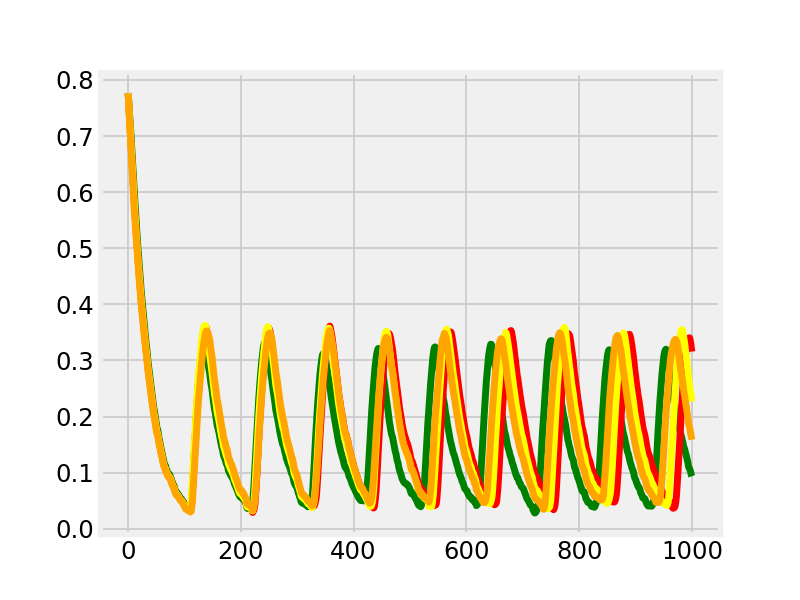

In [77]:
#plot 4 models for rDLPFC
figure(2)
with plt.style.context('fivethirtyeight'):
    #first set of models: healthy model with Q = 1 everywhere (green), depressed model with Q = 0 in some locations (red)
    plt.plot(timeHealthyOne, HealthyOne[:,18].T, color = "green")
    plt.plot(timeDeprZero, DepreZero[:,18].T, color = "red")
    
    #second set of models: healthy model with Q = 0 everywhere (yellow), depressed model with reduced C_ie in some locations (orange)
    plt.plot(timeHealthyZero, HealthyZero[:,18].T, color = "yellow")
    plt.plot(timeDepreC, DepreC[:,18].T, color = "orange")
    
    #further testing (for myself)
    #plt.plot(timeQ2, Q2[:,18].T, color = "blue") #reference model: highly inhibitory with Q = 2
    #plt.plot(timeDepreQ1, DepreQ1[:,18].T, color = "black")
    
    
#Save the figure
plt.savefig("rightDLPFC.png", dpi = 300, bbox_inches = "tight")

#Show the figure
plt.show()

#interpretation: green model most inhibitory --> because Q = 1 --> more inhibition 
#model with Q = 0 in certain regions is less inhibitory than green model --> good! because less inhibition in depression

#healthy model with Q = 0 compared to depressed model with reduced C_ie makes sense: more inhibition in healthy model, 
#but less obvious as difference between green and red model 

<IPython.core.display.Javascript object>


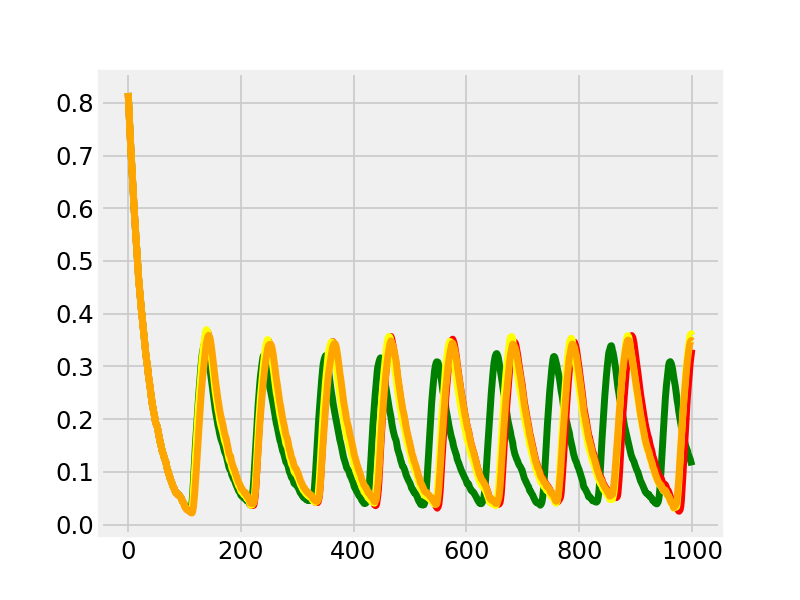

In [78]:
#plot 4 models for left DLPFC
figure(3)
with plt.style.context('fivethirtyeight'):
    plt.plot(timeHealthyOne, HealthyOne[:,56].T, color = "green")
    plt.plot(timeDeprZero, DepreZero[:,56].T, color = "red")
    plt.plot(timeHealthyZero, HealthyZero[:,56].T, color = "yellow")
    plt.plot(timeDepreC, DepreC[:,56].T, color = "orange")
    
#Save the figure
plt.savefig("leftDLPFC.png", dpi = 300, bbox_inches = "tight")

#Show the figure
plt.show()

#again: green and red model biggest difference: so model where healthy brain areas all have Q = 1 compared to model for depression 
#where some regions have Q = 0, makes most sense


<IPython.core.display.Javascript object>


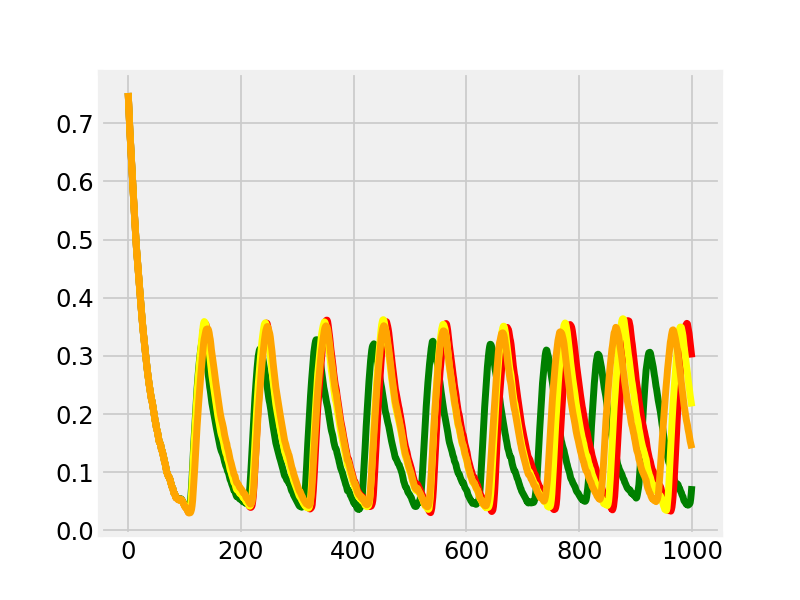

In [79]:
#plot 4 models for right orbitofrontal cortex
figure(4)
with plt.style.context('fivethirtyeight'):
    plt.plot(timeHealthyOne, HealthyOne[:,21].T, color = "green")
    plt.plot(timeDeprZero, DepreZero[:,21].T, color = "red")
    plt.plot(timeHealthyZero, HealthyZero[:,21].T, color = "yellow")
    plt.plot(timeDepreC, DepreC[:,21].T, color = "orange")
    
#Save the figure
plt.savefig("rightORB.png", dpi = 300, bbox_inches = "tight")

#Show the figure
plt.show()

#same findings

<IPython.core.display.Javascript object>


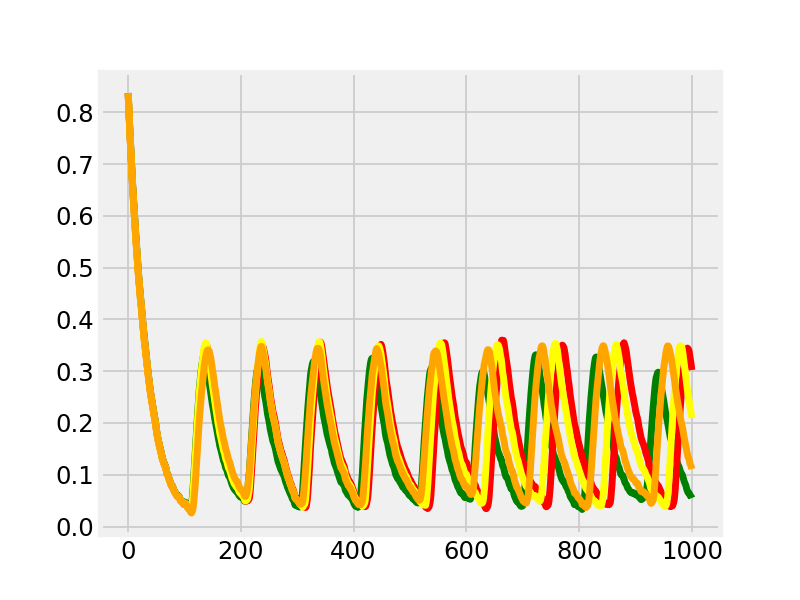

In [80]:
#plot 4 models for left orbitofrontal cortex
figure(5)
with plt.style.context('fivethirtyeight'):
    plt.plot(timeHealthyOne, HealthyOne[:,59].T, color = "green")
    plt.plot(timeDeprZero, DepreZero[:,59].T, color = "red")
    plt.plot(timeHealthyZero, HealthyZero[:,59].T, color = "yellow")
    plt.plot(timeDepreC, DepreC[:,59].T, color = "orange")
    
#Save the figure
plt.savefig("leftORB.png", dpi = 300, bbox_inches = "tight")

#Show the figure
plt.show()

#same findings


<IPython.core.display.Javascript object>


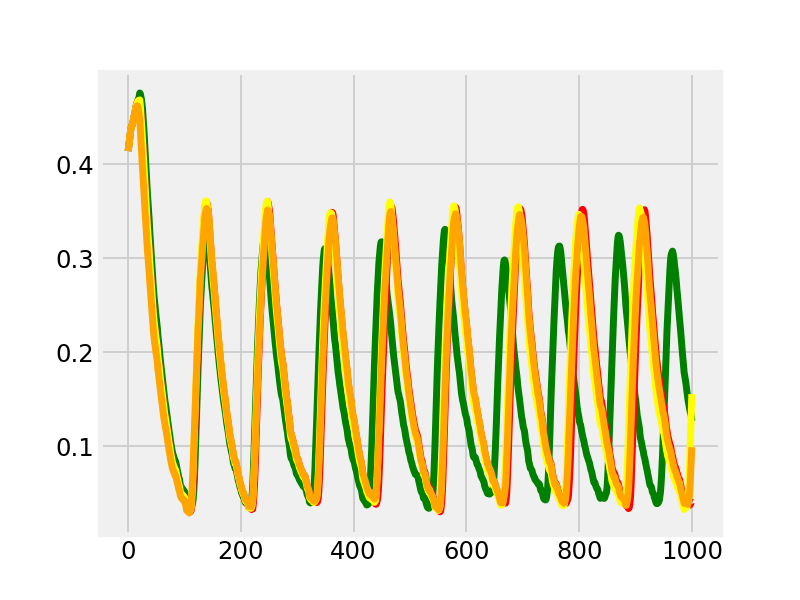

In [81]:
#plot 4 models for right V1
figure(6)
with plt.style.context('fivethirtyeight'):
    plt.plot(timeHealthyOne, HealthyOne[:,35].T, color = "green")
    plt.plot(timeDeprZero, DepreZero[:,35].T, color = "red")
    plt.plot(timeHealthyZero, HealthyZero[:,35].T, color = "yellow")
    plt.plot(timeDepreC, DepreC[:,35].T, color = "orange")
    
#Save the figure
plt.savefig("rightV1.png", dpi = 300, bbox_inches = "tight")

#Show the figure
plt.show()

#same findings

<IPython.core.display.Javascript object>


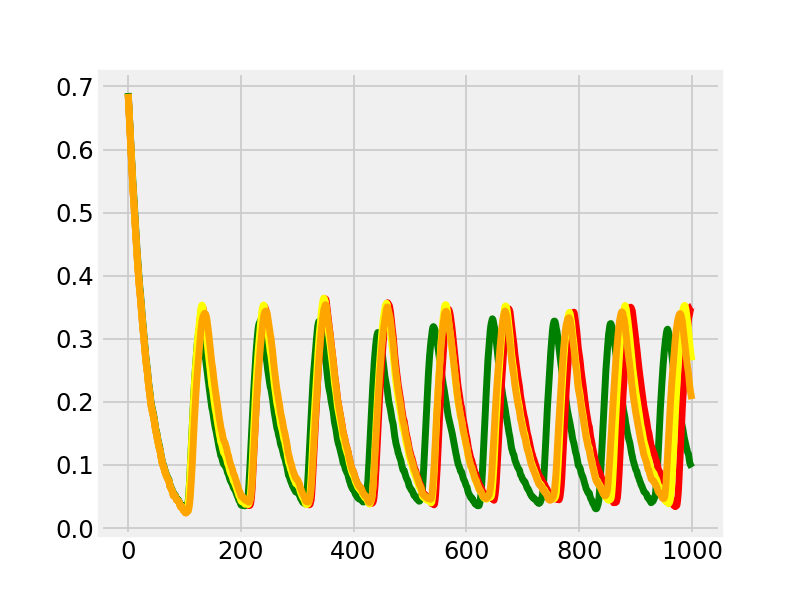

In [82]:
#plot 4 models for right V2
figure(7)
with plt.style.context('fivethirtyeight'):
    plt.plot(timeHealthyOne, HealthyOne[:,36].T, color = "green")
    plt.plot(timeDeprZero, DepreZero[:,36].T, color = "red")
    plt.plot(timeHealthyZero, HealthyZero[:,36].T, color = "yellow")
    plt.plot(timeDepreC, DepreC[:,36].T, color = "orange")
    
#Save the figure
plt.savefig("rightV2.png", dpi = 300, bbox_inches = "tight")

#Show the figure
plt.show()

#same findings

<IPython.core.display.Javascript object>


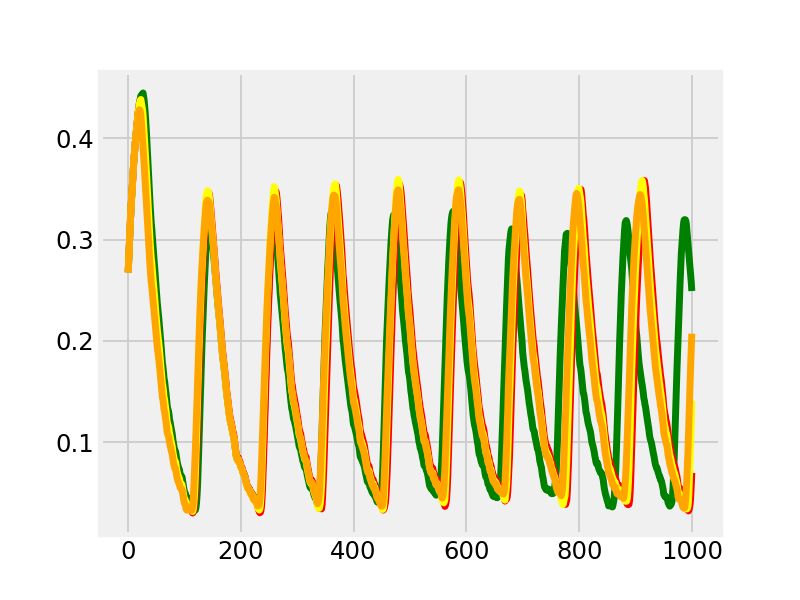

In [83]:
#plot 4 models for left V1
figure(8)
with plt.style.context('fivethirtyeight'):
    plt.plot(timeHealthyOne, HealthyOne[:,73].T, color = "green")
    plt.plot(timeDeprZero, DepreZero[:,73].T, color = "red")
    plt.plot(timeHealthyZero, HealthyZero[:,73].T, color = "yellow")
    plt.plot(timeDepreC, DepreC[:,73].T, color = "orange")
    
#Save the figure
plt.savefig("leftV1.png", dpi = 300, bbox_inches = "tight")

#Show the figure
plt.show()

#same findings, although healthy yellow model performs better here than before

<IPython.core.display.Javascript object>


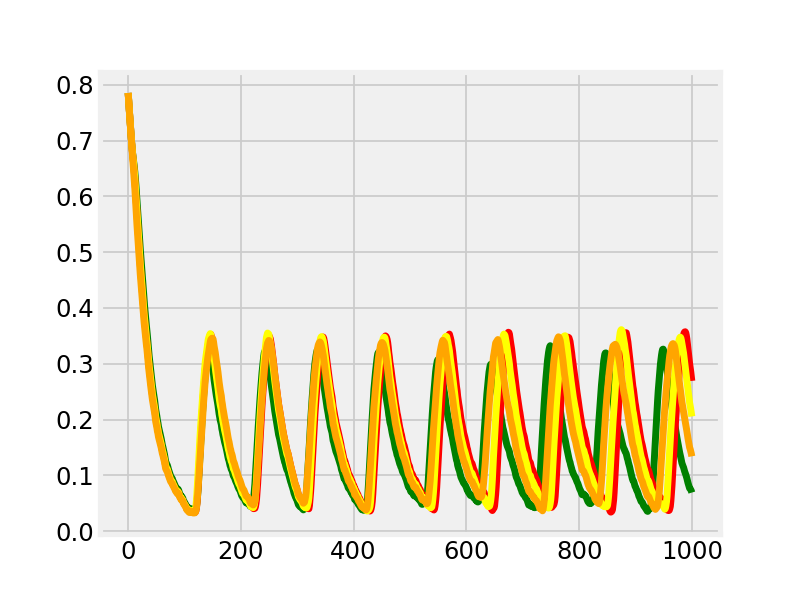

In [84]:
#plot 4 models for left V2
figure(9)
with plt.style.context('fivethirtyeight'):
    plt.plot(timeHealthyOne, HealthyOne[:,74].T, color = "green")
    plt.plot(timeDeprZero, DepreZero[:,74].T, color = "red")
    plt.plot(timeHealthyZero, HealthyZero[:,74].T, color = "yellow")
    plt.plot(timeDepreC, DepreC[:,74].T, color = "orange")
    
#Save the figure
plt.savefig("leftV2.png", dpi = 300, bbox_inches = "tight")

#Show the figure
plt.show()

#same findings 

<IPython.core.display.Javascript object>


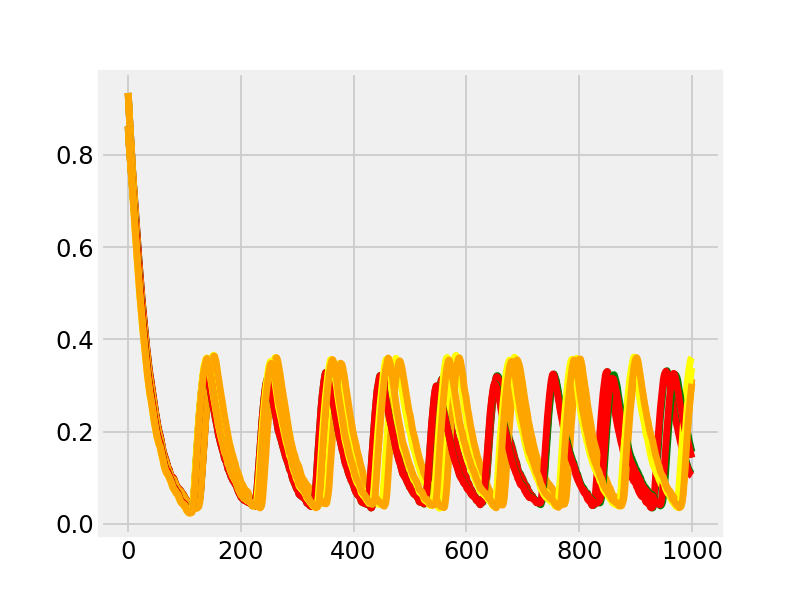

In [85]:
#plot 4 models for random area
figure(10)
with plt.style.context('fivethirtyeight'):
    plt.plot(timeHealthyOne, HealthyOne[:,3].T, color = "green")
    plt.plot(timeDeprZero, DepreZero[:,3].T, color = "red")
    plt.plot(timeHealthyZero, HealthyZero[:,3].T, color = "yellow")
    plt.plot(timeDepreC, DepreC[:,3].T, color = "orange")
    
#Save the figure
plt.savefig("randomareaRight.png", dpi = 300, bbox_inches = "tight")

#Show the figure
plt.show()

#finding: within a set (set of healthy brain with its linked depressed brain), the same oscillation intensity. So good! 
#because we didn't want to find any differences here between healthy and depressed

<IPython.core.display.Javascript object>


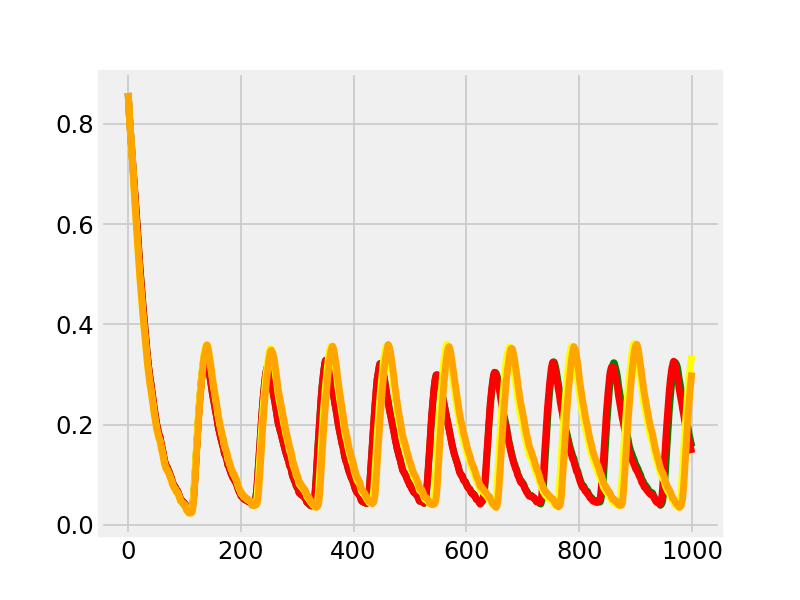

In [87]:
#plot 4 models for second random area
figure(11)
with plt.style.context('fivethirtyeight'):
    plt.plot(timeHealthyOne, HealthyOne[:,20].T, color = "green")
    plt.plot(timeDeprZero, DepreZero[:,20].T, color = "red")
    plt.plot(timeHealthyZero, HealthyZero[:,20].T, color = "yellow")
    plt.plot(timeDepreC, DepreC[:,20].T, color = "orange")
    
#Save the figure
plt.savefig("randomarea2.png", dpi = 300, bbox_inches = "tight")

#Show the figure
plt.show()

#same finding: within a set (set of healthy brain with its linked depressed brain), the same oscillation intensity. So good! 
#because we didn't want to find any differences here between healthy and depressed